# Mapping with Geopandas

Mapping is a GIS specialization unto itself, but in this reading I want to provide a really quick intro to some of the tools available for mapping data with geopandas.

## plot()

As we saw in our previous readings, the `.plot()` command is an easy way to create maps in geopandas. Just running `.plot()` will result in geopandas visualizing our data:

<AxesSubplot:>

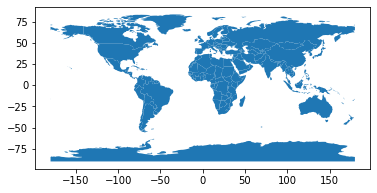

In [12]:
import geopandas as gpd

# Load GIS data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Plot!
world.plot()


Moreover, as we saw in our [intro reading](gis_what_is_it.ipynb), if you pass `.plot()` a column name, geopandas will color each observation based on the value of that variable to create something called a [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map):

<AxesSubplot:>

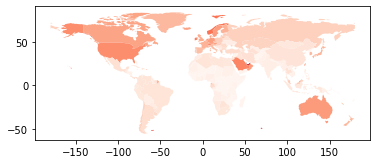

In [2]:
world["gdp_per_cap"] = world["gdp_md_est"] / world["pop_est"]
world = world[world["name"] != "Antarctica"].copy()
world.plot("gdp_per_cap", cmap="Reds")

 (Note the geopandas `.plot()` method also accepts all the usual arguments you might pass to matplotlib, like `cmap`, which controls the colors used in the plot).

And that's the basics of plotting! If you'd like to know more about the `.plot()` function, you can read more about it [here](https://geopandas.org/en/stable/docs/user_guide/mapping.html).

## Mapping with Altair

You aren't limited to the `.plot()` method (and matplotlib syntax) for plotting though -- you can also make Altair maps with the `alt.utils.sanitize_dataframe()` method:

In [15]:
import altair as alt

world = alt.utils.sanitize_dataframe(world)

alt.Chart(world[world["name"] != "Antarctica"]).mark_geoshape().encode(
    color="pop_est", tooltip=["name", "pop_est"]
)


alt.Chart(...)

Note that altair does not, natively, respect the CRS of the passed geodataframe, but it *does* have a `project()` method for re-projecting. You can find a full list of supported [projections here](https://vega.github.io/vega-lite/docs/projection.html#projection-types). Pictures of all projects available a little down from this [link](https://github.com/d3/d3-geo#).

In [25]:
alt.Chart(world[world["name"] != "Antarctica"]).mark_geoshape().project(
    "equalEarth"
).encode(color="pop_est", tooltip=["name", "pop_est"])


alt.Chart(...)

## Native Interactive Maps

But perhaps the coolest mapping trick that is provided by geopandas is the ability to create interactive maps just using the `.explore()` method!

In [29]:
world.explore()

Which can also be combined with lots of options:

In [36]:
world.explore(
    column="pop_est",
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=False,  # show legend
    k=10,  # use 10 bins
    name="countries",  # name of the layer in the map
    cmap="Reds"
)


To learn more, [you can read the full docs here!](https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html) and/or try it yourself!